# Initialise Spark and Reading Data

In [5]:
# Initialise Spark

from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("nyc_tickets_assignment").getOrCreate()

In [6]:
# Checking the session object

spark

In [7]:
# for graphs 
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
# Read data

nyc_tickets = spark.read.format("csv").option("header", "true").option("inferSchema", "true").load("/common_folder/nyc_parking/Parking_Violations_Issued_-_Fiscal_Year_2017.csv")

In [9]:
#Examine the data

nyc_tickets.show(5)

+--------------+--------+------------------+-------------------+--------------+-----------------+------------+------------------+---------------+--------------+
|Summons Number|Plate ID|Registration State|         Issue Date|Violation Code|Vehicle Body Type|Vehicle Make|Violation Precinct|Issuer Precinct|Violation Time|
+--------------+--------+------------------+-------------------+--------------+-----------------+------------+------------------+---------------+--------------+
|    5092469481| GZH7067|                NY|2016-07-10 00:00:00|             7|             SUBN|       TOYOT|                 0|              0|         0143A|
|    5092451658| GZH7067|                NY|2016-07-08 00:00:00|             7|             SUBN|       TOYOT|                 0|              0|         0400P|
|    4006265037| FZX9232|                NY|2016-08-23 00:00:00|             5|             SUBN|        FORD|                 0|              0|         0233P|
|    8478629828| 66623ME|         

# Inspecting and Prelimnary Check of the Dataset

In [10]:
#DataFame will have columns, and we use a schema to define them.

nyc_tickets.printSchema()

root
 |-- Summons Number: long (nullable = true)
 |-- Plate ID: string (nullable = true)
 |-- Registration State: string (nullable = true)
 |-- Issue Date: timestamp (nullable = true)
 |-- Violation Code: integer (nullable = true)
 |-- Vehicle Body Type: string (nullable = true)
 |-- Vehicle Make: string (nullable = true)
 |-- Violation Precinct: integer (nullable = true)
 |-- Issuer Precinct: integer (nullable = true)
 |-- Violation Time: string (nullable = true)



In [11]:
#Returns the schema of this DataFrame as a pyspark.sql.types.StructType.

nyc_tickets.schema


StructType(List(StructField(Summons Number,LongType,true),StructField(Plate ID,StringType,true),StructField(Registration State,StringType,true),StructField(Issue Date,TimestampType,true),StructField(Violation Code,IntegerType,true),StructField(Vehicle Body Type,StringType,true),StructField(Vehicle Make,StringType,true),StructField(Violation Precinct,IntegerType,true),StructField(Issuer Precinct,IntegerType,true),StructField(Violation Time,StringType,true)))

In [12]:
# summary statistics

nyc_tickets.describe().toPandas()

summary        Summons Number  Plate ID Registration State  \
0   count              10803028  10803028           10803028   
1    mean  6.8174470290656595E9  Infinity               99.0   
2  stddev   2.320233962328229E9       NaN                0.0   
3     min            1002884949     #1MOM                 99   
4     max            8585600044         ~                 WY   

       Violation Code   Vehicle Body Type        Vehicle Make  \
0            10803028            10803028            10803028   
1  34.599430455979565  3.9258887134586864   6519.974025974026   
2  19.359868716323483  0.5013415469252523  18091.257389147086   
3                   0                  00               ,FREI   
4                  99                 nan                 nan   

   Violation Precinct    Issuer Precinct     Violation Time  
0            10803028           10803028           10803028  
1   45.01216260848347  46.82931211508477  909.2857142857143  
2  40.552560268435805  62.66703577269466  791.8453853409226  
3                   0                  0              .240P  
4                 933                997                nan

In [13]:
#Number of records
nyc_tickets.count()

10803028

In [14]:
#Number of columns
len(nyc_tickets.columns)

10

In [15]:
# Some observations from above:

#1. There are about 10,803,028 records
#2. State is a string but has a numeric number 99, this needs to be rectified
#3. Vehicle Body Type, Vehicle make and violation time has Nan, needs to be looked at


In [16]:
# Dropping NaN Values

nyc_tickets=nyc_tickets.na.drop()
nyc_tickets.count()

# There are no Null records as the count before dropping Na and after is the same 10803028

10803028

In [17]:
# Summons is the unique number and hence seeing they are all unique values

nyc_tickets.select('Summons Number').distinct().count()

# There are no Duplicate records in Summons as the count 
#of unique vales of Summons is the same as number of records 10803028

10803028

In [18]:
## As per the assignment guidelines, we should look at parking tickets for the year 2017.Let us see the dataset

In [19]:
#creating a temporary tabe;
nyc_tickets.createOrReplaceTempView("nyc_tickets_table")

In [20]:
#using select statement to analyse the temp table
spark.sql('Select * from nyc_tickets_table')

DataFrame[Summons Number: bigint, Plate ID: string, Registration State: string, Issue Date: timestamp, Violation Code: int, Vehicle Body Type: string, Vehicle Make: string, Violation Precinct: int, Issuer Precinct: int, Violation Time: string]

In [21]:

# Total number of tickets for each year
nyc_tickets_sql_year_table = spark.sql("select year(`Issue Date`) as year, count(`Summons Number`) \
                as no_of_tickets from  nyc_tickets_table group by year order by year")
nyc_tickets_sql_year_table.show(100)

+----+-------------+
|year|no_of_tickets|
+----+-------------+
|1972|            2|
|1973|            2|
|1974|            1|
|1976|            1|
|1977|            1|
|1984|            1|
|1985|            1|
|1990|            2|
|1991|            3|
|1994|            1|
|1996|            1|
|1997|            1|
|2000|          185|
|2001|            2|
|2002|            1|
|2003|            1|
|2004|            2|
|2005|            1|
|2006|            8|
|2007|           18|
|2008|            4|
|2009|            3|
|2010|           48|
|2011|           22|
|2012|           87|
|2013|           70|
|2014|          120|
|2015|          419|
|2016|      5368391|
|2017|      5431918|
|2018|         1057|
|2019|          472|
|2020|           22|
|2021|           22|
|2022|            4|
|2023|            5|
|2024|            3|
|2025|            6|
|2026|           24|
|2027|           50|
|2028|            8|
|2029|            2|
|2030|           12|
|2031|            5|
|2033|       

In [22]:
nyc_tickets_sql_year_table.count()

55

In [23]:
# from the above it is evident, the data consists of many years from 1972, there are 55 distinct years
# We need to review only 2017, which only 5431918 records out of 10803028, which is 50% of data


### Creating a Dataset only for 2017

In [24]:
# For using SQL, we  create a temporary view
nyc_tickets.createOrReplaceTempView("nyc_tickets_2017")



In [25]:
# Filtering only 2017 data
nyc_tickets = spark.sql("select * from nyc_tickets_2017 where year(TO_DATE(CAST(UNIX_TIMESTAMP(`Issue Date`,'MM/dd/yyyy') AS TIMESTAMP))) = 2017 ")
nyc_tickets.count()
# the number of rows 5431918 is same as what we got last time
# data has been filtered for 2017
                     

5431918

In [26]:
# replacing the blanks in column names with _
nyc_tickets = nyc_tickets.toDF(*(c.replace(' ', '_') for c in nyc_tickets.columns))
nyc_tickets.show(5)

+--------------+--------+------------------+-------------------+--------------+-----------------+------------+------------------+---------------+--------------+
|Summons_Number|Plate_ID|Registration_State|         Issue_Date|Violation_Code|Vehicle_Body_Type|Vehicle_Make|Violation_Precinct|Issuer_Precinct|Violation_Time|
+--------------+--------+------------------+-------------------+--------------+-----------------+------------+------------------+---------------+--------------+
|    8478629828| 66623ME|                NY|2017-06-14 00:00:00|            47|             REFG|       MITSU|                14|             14|         1120A|
|    5096917368| FZD8593|                NY|2017-06-13 00:00:00|             7|             SUBN|       ME/BE|                 0|              0|         0852P|
|    1407740258| 2513JMG|                NY|2017-01-11 00:00:00|            78|             DELV|       FRUEH|               106|            106|         0015A|
|    1413656420|T672371C|         

# Exploring the Data for 2017

In [27]:
# Creating a temporary view for SQL use
nyc_tickets.createOrReplaceTempView("tble_nyc_tickets")

In [28]:
# looking at Plate ID

plate_id_eda=spark.sql("Select Plate_ID, count(*) as Ticket_Frequency from tble_nyc_tickets group by Plate_ID having count(*)>1 order by Ticket_Frequency desc")
plate_id_eda.show()

# Plate ID "blankplate" will be no use for analysis and is 0.1% of data and hence to be dropped


+----------+----------------+
|  Plate_ID|Ticket_Frequency|
+----------+----------------+
|BLANKPLATE|            5261|
|   96089MA|             529|
|   96087MA|             528|
|   94905JA|             527|
|   14828MJ|             526|
|   85848MD|             512|
|   30954JX|             510|
|   2121796|             507|
|   16242TC|             496|
|   2194153|             495|
|   77116MA|             493|
|   47603MD|             492|
|   12359MG|             474|
|   16208TC|             468|
|   49731MA|             464|
|   14829MJ|             460|
|   49331KA|             458|
|    XEEF98|             458|
|   2028685|             454|
|    AT459E|             452|
+----------+----------------+
only showing top 20 rows



In [29]:
# Dropping Plates with name Blankplate
nyc_tickets=nyc_tickets[nyc_tickets.Plate_ID!='BLANKPLATE']
nyc_tickets.count()

# number of records has reduced from 5431918 to 5426657 due to dropping blank columns

5426657

In [30]:
# Creating a temporary view for SQL use
nyc_tickets.createOrReplaceTempView("tble_nyc_tickets")

In [31]:
# looking at Registration State

Registration_State_eda=spark.sql("Select Registration_State, count(*) as Count_tickets from tble_nyc_tickets group by Registration_State having count(*)>1 order by Count_tickets desc")


In [32]:
# Inspecting Registration State

Registration_State_eda.show(1000)

# There is state called 99 with 10794, as per Assignment instructions to be treated as NY


+------------------+-------------+
|Registration_State|Count_tickets|
+------------------+-------------+
|                NY|      4273951|
|                NJ|       475825|
|                PA|       140286|
|                CT|        70403|
|                FL|        69468|
|                IN|        45525|
|                MA|        38941|
|                VA|        34367|
|                MD|        30213|
|                NC|        27152|
|                TX|        18827|
|                IL|        18666|
|                GA|        17537|
|                AZ|        12379|
|                OH|        12281|
|                CA|        12153|
|                ME|        10806|
|                99|        10794|
|                SC|        10395|
|                MN|        10083|
|                OK|         9088|
|                TN|         8514|
|                DE|         7905|
|                MI|         7231|
|                RI|         5814|
|                NH|

In [33]:
# Replacing NY where state Name is 99

from pyspark.sql.functions import when,lit
nyc_tickets=nyc_tickets.withColumn('Registration_State',when(nyc_tickets["Registration_State"]=="99",lit('NY')).otherwise(nyc_tickets["Registration_State"]))




In [34]:
# Creating a temporary view for SQL use
nyc_tickets.createOrReplaceTempView("tble_nyc_tickets")

In [35]:
# looking at Registration State

Registration_State_eda=spark.sql("Select Registration_State, count(*) as Count_tickets from tble_nyc_tickets group by Registration_State having count(*)>1 order by Count_tickets desc")
Registration_State_eda.show()

# you can see no 99 and count of NY has increased from last time

+------------------+-------------+
|Registration_State|Count_tickets|
+------------------+-------------+
|                NY|      4284745|
|                NJ|       475825|
|                PA|       140286|
|                CT|        70403|
|                FL|        69468|
|                IN|        45525|
|                MA|        38941|
|                VA|        34367|
|                MD|        30213|
|                NC|        27152|
|                TX|        18827|
|                IL|        18666|
|                GA|        17537|
|                AZ|        12379|
|                OH|        12281|
|                CA|        12153|
|                ME|        10806|
|                SC|        10395|
|                MN|        10083|
|                OK|         9088|
+------------------+-------------+
only showing top 20 rows



In [36]:
# Creating a temporary view for SQL use
nyc_tickets.createOrReplaceTempView("tble_nyc_tickets")

In [37]:
# looking at Vehicle_Body_Type

Vehicle_Body_Type_eda=spark.sql("Select Vehicle_Body_Type, count(*) as Count_tickets from tble_nyc_tickets group by Vehicle_Body_Type having count(*)>1 order by Count_tickets desc")
Vehicle_Body_Type_eda.show()

# there 18,476 vehicles with nan, since it is only 0.34% of the 
#total data it is ignored and no change done and will not impact the EDA



+-----------------+-------------+
|Vehicle_Body_Type|Count_tickets|
+-----------------+-------------+
|             SUBN|      1882978|
|             4DSD|      1547063|
|              VAN|       723796|
|             DELV|       358924|
|              SDN|       192927|
|             PICK|       135752|
|             2DSD|       135651|
|             REFG|        59629|
|             TRAC|        40021|
|             TAXI|        32599|
|             UTIL|        31135|
|              BUS|        24739|
|             4 DR|        24153|
|             CONV|        22056|
|              nan|        18476|
|             WAGO|        17465|
|               4D|        16647|
|             TRLR|        14280|
|              MCY|        12477|
|               TK|        11386|
+-----------------+-------------+
only showing top 20 rows



In [38]:
# looking at Vehicle_Body_Type

Vehicle_Body_Type_eda=spark.sql("Select Vehicle_Body_Type, count(*) as Count_tickets from tble_nyc_tickets where Vehicle_Body_Type == 0 group by Vehicle_Body_Type having count(*)>1 order by Count_tickets desc")
Vehicle_Body_Type_eda.show()

+-----------------+-------------+
|Vehicle_Body_Type|Count_tickets|
+-----------------+-------------+
|               00|           14|
+-----------------+-------------+



In [39]:
# looking at Vehicle_Body_Type

Vehicle_Make_eda=spark.sql("Select Vehicle_Make, count(*) as Count_tickets from tble_nyc_tickets group by Vehicle_Make having count(*)>1 order by Count_tickets desc")
Vehicle_Make_eda.show()

# the vehicle_make with nan s not many hence ignored as it will not impact the EDA

+------------+-------------+
|Vehicle_Make|Count_tickets|
+------------+-------------+
|        FORD|       636527|
|       TOYOT|       605011|
|       HONDA|       538460|
|       NISSA|       461725|
|       CHEVR|       355868|
|       FRUEH|       230748|
|       ME/BE|       197437|
|       DODGE|       187617|
|         BMW|       186516|
|        JEEP|       175744|
|       HYUND|       148573|
|       INTER|       128725|
|         GMC|       127532|
|       LEXUS|       122028|
|       ACURA|       100547|
|       INFIN|        88536|
|       CHRYS|        85478|
|       VOLKS|        84971|
|       SUBAR|        71764|
|        AUDI|        68783|
+------------+-------------+
only showing top 20 rows



In [40]:
# checking for Null values



null_values=spark.sql("Select count(*) as Count_Null from tble_nyc_tickets where Summons_Number is NULL or Plate_ID is NULL or Registration_State is NULL or Issue_Date is NULL or Violation_Code is NULL or Vehicle_Body_Type is NULL or Vehicle_Make is NULL or Violation_Precinct is NULL or Issuer_Precinct is NUll or Violation_Time is NULL ")
null_values.show()

# there are no null values


+----------+
|Count_Null|
+----------+
|         0|
+----------+



# Questions to Be Answered in the Analysis

## Examine the data

### 1.  Find the total number of tickets for the year

In [41]:
from pyspark.sql.functions import countDistinct
from pyspark.sql.functions import col, countDistinct


nyc_tickets.agg(countDistinct(col("Summons_Number")).alias("count of summon")).show()

+---------------+
|count of summon|
+---------------+
|        5426657|
+---------------+



In [42]:
### Number of Tickets issued in 2017 is 5426657 

### 2. Find out the number of unique states from where the cars that got parking tickets came.

In [43]:
nyc_tickets.select(countDistinct(col("Registration_State")).alias("count of states")).show()

+---------------+
|count of states|
+---------------+
|             64|
+---------------+



In [44]:
### There are 64 unique states from where the cars that got parking tickets came

In [45]:
### 2. Find out the number of unique states from where the cars that got parking tickets came.

## Aggregation tasks

### 1. How often does each violation code occur? Display the frequency of the top five violation codes.

In [46]:
# Total number of violation codes

from pyspark.sql.functions import count, col

nyc_tickets.select(countDistinct("Violation_Code")).show()

# there are 100 different type of violation codes

+------------------------------+
|count(DISTINCT Violation_Code)|
+------------------------------+
|                           100|
+------------------------------+



In [47]:
# displaying count of various violation codes
q1 = nyc_tickets.groupBy("Violation_Code").count().alias("count").sort(col("count").desc())
q1.show(100)

# Answer : How often does each violation code occur - See below

+--------------+------+
|Violation_Code| count|
+--------------+------+
|            21|767740|
|            36|662765|
|            38|541526|
|            14|476405|
|            20|319439|
|            46|312168|
|            37|293038|
|            40|276905|
|            71|263124|
|             7|210176|
|            19|148978|
|            70|144242|
|            69| 96881|
|            31| 80528|
|            16| 74768|
|            47| 65427|
|            74| 57388|
|            50| 53710|
|             5| 48081|
|            48| 40970|
|            84| 40932|
|            24| 38435|
|            17| 38430|
|            51| 32553|
|            42| 32000|
|             9| 28670|
|            78| 26752|
|            10| 25917|
|            68| 25029|
|            98| 23883|
|            53| 19478|
|            82| 17284|
|            66| 13115|
|            13| 11667|
|            18| 10185|
|            23|  9689|
|            85|  9311|
|            67|  7359|
|            64|

In [48]:
# displaying top 5 count of various violation codes

q1.show(5)

# Display the frequency of the top five violation codes.- See below

+--------------+------+
|Violation_Code| count|
+--------------+------+
|            21|767740|
|            36|662765|
|            38|541526|
|            14|476405|
|            20|319439|
+--------------+------+
only showing top 5 rows



<Figure size 432x288 with 0 Axes>

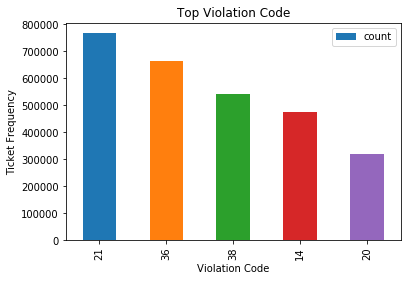

In [49]:

# Top 5 Violation code in Plot
q1_graph = q1.toPandas()
plt.clf()
q1_graph.head(5).plot(x='Violation_Code', y='count', kind='bar')
plt.title("Top Violation Code")
plt.xlabel('Violation Code')
plt.ylabel('Ticket Frequency')
plt.show()

### 2. How often does each 'vehicle body type' get a parking ticket? How about the 'vehicle make'?

### Vehicle Body Type

In [50]:
#Tickets frequency by Vehicle Body for Top 5
q2 = nyc_tickets.groupBy("Vehicle_Body_Type").count().alias("count").sort(col("count").desc())
q2.show(5)

# How often does each 'vehicle body type' get a parking ticket? - See Answer below

+-----------------+-------+
|Vehicle_Body_Type|  count|
+-----------------+-------+
|             SUBN|1882978|
|             4DSD|1547063|
|              VAN| 723796|
|             DELV| 358924|
|              SDN| 192927|
+-----------------+-------+
only showing top 5 rows



<Figure size 432x288 with 0 Axes>

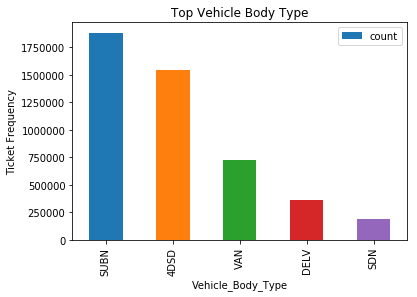

In [51]:

# Top 5 Vehicle Body Type in Plot
q2_graph = q2.toPandas()
plt.clf()
q2_graph.head(5).plot(x='Vehicle_Body_Type', y='count', kind='bar')
plt.title("Top Vehicle Body Type")
plt.xlabel('Vehicle_Body_Type')
plt.ylabel('Ticket Frequency')
plt.show()

# Vehicle Make

In [52]:
#Tickets frequency by Vehicle Make for Top 5
q2a = nyc_tickets.groupBy("Vehicle_Make").count().alias("count").sort(col("count").desc())
q2a.show(5)

# How often does each 'vehicle Make' get a parking ticket? - See Answer below

+------------+------+
|Vehicle_Make| count|
+------------+------+
|        FORD|636527|
|       TOYOT|605011|
|       HONDA|538460|
|       NISSA|461725|
|       CHEVR|355868|
+------------+------+
only showing top 5 rows



<Figure size 432x288 with 0 Axes>

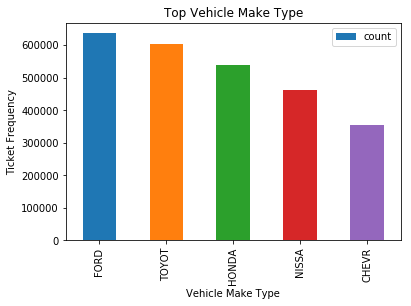

In [53]:

# Top 5 Vehicle Make in Plot
q2a_graph = q2a.toPandas()
plt.clf()
q2a_graph.head(5).plot(x='Vehicle_Make', y='count', kind='bar')
plt.title("Top Vehicle Make Type")
plt.xlabel('Vehicle Make Type')
plt.ylabel('Ticket Frequency')
plt.show()

### Q 3 - A precinct is a police station that has a certain zone of the city under its command. Find the (5 highest) frequencies of tickets for each of the following:

### Q3a - Find the (5 highest) frequencies of tickets - 'Violation Precinct' 

In [54]:
# Violation Precinct - Top 5 Entries
q3a = nyc_tickets.groupBy("Violation_Precinct").count().alias("count").sort(col("count").desc())
q3a.show(6)

# Precinct' as '0'. These are erroneous entries. 
#Hence, taking top 6 to provide five correct precincts.

+------------------+------+
|Violation_Precinct| count|
+------------------+------+
|                 0|925395|
|                19|274264|
|                14|203375|
|                 1|174620|
|                18|169043|
|               114|147223|
+------------------+------+
only showing top 6 rows



In [55]:
# Violation Precinct - Top 5 Entries after removing Precint 0
q3a = nyc_tickets.groupBy("Violation_Precinct").count().alias("count").sort(col("count").desc())
q3a = q3a[q3a.Violation_Precinct!=0]
q3a.show(5)

+------------------+------+
|Violation_Precinct| count|
+------------------+------+
|                19|274264|
|                14|203375|
|                 1|174620|
|                18|169043|
|               114|147223|
+------------------+------+
only showing top 5 rows



<Figure size 432x288 with 0 Axes>

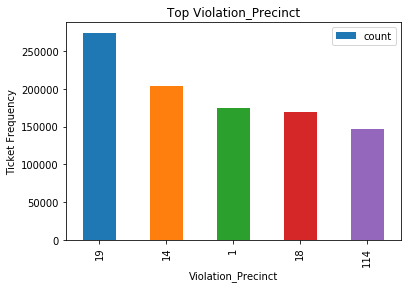

In [56]:

# Top 5 Violation Precint
q3a_graph = q3a.toPandas()
plt.clf()
q3a_graph.head(5).plot(x='Violation_Precinct', y='count', kind='bar')
plt.title("Top Violation_Precinct")
plt.xlabel('Violation_Precinct')
plt.ylabel('Ticket Frequency')
plt.show()

### Q3b - Find the (5 highest) frequencies of tickets - 'Issuer Precinct'

In [57]:
# Issuer Precinct - Top 5 Entries
q3b = nyc_tickets.groupBy("Issuer_Precinct").count().alias("count").sort(col("count").desc())
q3b.show(6)

# Precinct' as '0'. These are erroneous entries. 
#Hence, taking top 6 to provide five correct precincts.

+---------------+-------+
|Issuer_Precinct|  count|
+---------------+-------+
|              0|1077884|
|             19| 266790|
|             14| 200328|
|              1| 168630|
|             18| 162908|
|            114| 143900|
+---------------+-------+
only showing top 6 rows



In [58]:
# Issuer Precinct - Top 5 Entries after removing Precint 0
q3b = nyc_tickets.groupBy("Issuer_Precinct").count().alias("count").sort(col("count").desc())
q3b = q3b[q3b.Issuer_Precinct!=0]
q3b.show(5)

+---------------+------+
|Issuer_Precinct| count|
+---------------+------+
|             19|266790|
|             14|200328|
|              1|168630|
|             18|162908|
|            114|143900|
+---------------+------+
only showing top 5 rows



<Figure size 432x288 with 0 Axes>

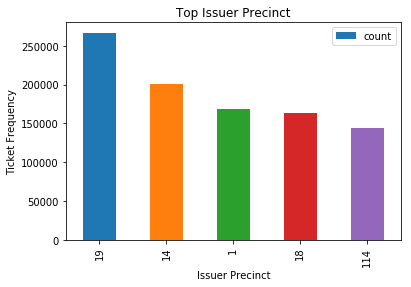

In [59]:

# Top 5 Issuer  Precint
q3b_graph = q3b.toPandas()
plt.clf()
q3b_graph.head(5).plot(x='Issuer_Precinct', y='count', kind='bar')
plt.title("Top Issuer Precinct")
plt.xlabel('Issuer Precinct')
plt.ylabel('Ticket Frequency')
plt.show()

In [60]:
# Answer the Top 5 Violations based on Violatin Precint where it occurs and who issues is the same
# 19,  14, 1, 18 and 115

### Q4 Find the violation code frequencies for three precincts that have issued the most number of tickets. Do these precinct zones have an exceptionally high frequency of certain violation codes? Are these codes common across precincts? 

### Q4a -  Find the violation code frequencies for three precincts that have issued the most number of tickets

In [61]:
# Creating a temporary view for SQL use
nyc_tickets.createOrReplaceTempView("tble_nyc_tickets")

In [62]:
# Code for Question 4a in SQL view
q4a = spark.sql("select Issuer_Precinct,Violation_Code, count(*) as Count from tble_nyc_tickets group by Issuer_Precinct, Violation_Code order by Count desc" )
q4a.show(10)

#Not considering 0. Therefore 18,19,14 are the three issuer precincts with maximum number of violations.



+---------------+--------------+------+
|Issuer_Precinct|Violation_Code| Count|
+---------------+--------------+------+
|              0|            36|662765|
|              0|             7|210175|
|              0|            21|125923|
|             18|            14| 50135|
|             19|            46| 48422|
|              0|             5| 48076|
|             14|            14| 45019|
|              1|            14| 38345|
|             19|            38| 36332|
|             19|            37| 36046|
+---------------+--------------+------+
only showing top 10 rows



In [63]:
#Answer Q4a
# Code for Question 4a in SQL view after elmination Issuer Precints with 0 code

q4a = spark.sql("select Issuer_Precinct,Violation_Code, count(*) as Count from tble_nyc_tickets where Issuer_Precinct!=0 group by Issuer_Precinct, Violation_Code order by Count desc" )
q4a.show(3)



+---------------+--------------+-----+
|Issuer_Precinct|Violation_Code|Count|
+---------------+--------------+-----+
|             18|            14|50135|
|             19|            46|48422|
|             14|            14|45019|
+---------------+--------------+-----+
only showing top 3 rows



### Q4b - Do these precinct zones have an exceptionally high frequency of certain violation codes? 

In [64]:

# Detailed review for Issuer Precinct 18 - Top 10 Violation codes - See Answer below
Q4b_18 = spark.sql("select Violation_Code, count(*) as Count from tble_nyc_tickets where Issuer_Precinct=18 group by Violation_Code order by Count desc" )
Q4b_18.show(10)


+--------------+-----+
|Violation_Code|Count|
+--------------+-----+
|            14|50135|
|            69|20188|
|            47|14105|
|            31|11887|
|            46| 7861|
|            42| 6189|
|            38| 6157|
|            84| 5188|
|            19| 4580|
|            20| 4109|
+--------------+-----+
only showing top 10 rows



In [65]:

# Detailed review for Issuer Precinct 19 - Top 10 Violation codes - See Answer below
Q4b_19 = spark.sql("select Violation_Code, count(*) as Count from tble_nyc_tickets where Issuer_Precinct=19 group by Violation_Code order by Count desc" )
Q4b_19.show(10)


+--------------+-----+
|Violation_Code|Count|
+--------------+-----+
|            46|48422|
|            38|36332|
|            37|36046|
|            14|29791|
|            21|28409|
|            20|14624|
|            40|11408|
|            16| 9921|
|            71| 7489|
|            19| 6854|
+--------------+-----+
only showing top 10 rows



### Q4c - Are these codes common across precincts?

In [105]:
# The above violations codes are common among precints.

### Q 5a - Find out the properties of parking violations across different times of the day:- Find a way to deal with missing values, if any.

In [68]:
# Number of missing values
Violation_Time_2017  = spark.sql("SELECT count(*) as No_of_Counts from tble_nyc_tickets WHERE Violation_Time is NULL")
Violation_Time_2017.show()

# There are no missing values

+------------+
|No_of_Counts|
+------------+
|           0|
+------------+



In [69]:
#Checking for the null value
from pyspark.sql.functions import col
nyc_tickets.where(col("Violation_Time").isNull()).show()

# There are no null values
# Hence nothing to drop

+--------------+--------+------------------+----------+--------------+-----------------+------------+------------------+---------------+--------------+
|Summons_Number|Plate_ID|Registration_State|Issue_Date|Violation_Code|Vehicle_Body_Type|Vehicle_Make|Violation_Precinct|Issuer_Precinct|Violation_Time|
+--------------+--------+------------------+----------+--------------+-----------------+------------+------------------+---------------+--------------+
+--------------+--------+------------------+----------+--------------+-----------------+------------+------------------+---------------+--------------+



### Q 5b - Find out the properties of parking violations across different times of the day:- The Violation Time field is specified in a strange format. Find a way to make this a time attribute that you can use to divide into groups.

In [70]:
nyc_tickets.select('Violation_Time').show()

#the first two represents Hour, the next two minutes and A is AM and P PM

+--------------+
|Violation_Time|
+--------------+
|         1120A|
|         0852P|
|         0015A|
|         0525A|
|         0256P|
|         1232A|
|         1034A|
|         1021A|
|         0721A|
|         0940A|
|         1223P|
|         1028A|
|         0148A|
|         1206P|
|         0141P|
|         0822A|
|         0820A|
|         1043A|
|         0204P|
|         0853A|
+--------------+
only showing top 20 rows



### Q5b - Find a way to make this a time attribute that you can use to divide into groups.

In [71]:
# Divide 24 hours into six equal discrete bins of time, every 4 hour one bin.

# Bin       Time Interval
# 1         12:00 AM to 4:00 AM
# 2         4:00 AM to 8:00 AM
# 3         8:00 AM to 12:00 PM
# 4         12:00 PM to 4:00 PM
# 5         4:00 PM to 8:00 PM
# 6         8:00 PM to 12:00 AM


time_bin=spark.sql("SELECT Summons_Number, Violation_Code , Violation_Time, Issuer_Precinct, case when substring(Violation_Time,1,2) in ('00','01','02','03','12') and upper(substring(Violation_Time,-1))='A' then 1 when substring(Violation_Time,1,2) in ('04','05','06','07') and upper(substring(Violation_Time,-1))='A' then 2 when substring(Violation_Time,1,2) in ('08','09','10','11') and upper(substring(Violation_Time,-1))='A' then 3 when substring(Violation_Time,1,2) in ('12','00','01','02','03') and upper(substring(Violation_Time,-1))='P' then 4 when substring(Violation_Time,1,2) in ('04','05','06','07') and upper(substring(Violation_Time,-1))='P' then 5 when substring(Violation_Time,1,2) in ('08','09','10','11') and upper(substring(Violation_Time,-1))='P' then 6 else null end as Violation_Time_bin from tble_nyc_tickets where Violation_Time is not null or (length(Violation_Time)=5 and upper(substring(Violation_Time,-1)) in ('A','P') and substring(Violation_Time,1,2) in ('00','01','02','03','04','05','06','07', '08','09','10','11','12'))")
time_bin.show()



+--------------+--------------+--------------+---------------+------------------+
|Summons_Number|Violation_Code|Violation_Time|Issuer_Precinct|Violation_Time_bin|
+--------------+--------------+--------------+---------------+------------------+
|    8478629828|            47|         1120A|             14|                 3|
|    5096917368|             7|         0852P|              0|                 6|
|    1407740258|            78|         0015A|            106|                 1|
|    1413656420|            40|         0525A|             73|                 2|
|    8480309064|            64|         0256P|             17|                 4|
|    1416638830|            20|         1232A|             17|                 1|
|    4630524241|            36|         1034A|              0|                 3|
|    8505131836|            38|         1021A|              1|                 3|
|    8513520615|            14|         0721A|             24|                 2|
|    8556155431|

### Q5b - For each of these groups, find the three most commonly occurring violations.

In [72]:
# creating a temporary table after appending bin information
time_bin.createOrReplaceTempView("time_bins_tbl")

In [73]:
#Analysis of Bin1 for three commonly occuring violation codes
bin1_violation = spark.sql("select Violation_Code,count(*) Vio_cnt from time_bins_tbl where Violation_Time_bin == 1 group by Violation_Code order by Vio_cnt desc")
bin1_violation.show(3)

+--------------+-------+
|Violation_Code|Vio_cnt|
+--------------+-------+
|            21|  36934|
|            40|  25810|
|            78|  15513|
+--------------+-------+
only showing top 3 rows



In [74]:
#Analysis of Bin2 for three commonly occuring violation codes
bin2_violation = spark.sql("select Violation_Code,count(*) Vio_cnt from time_bins_tbl where Violation_Time_bin == 2 group by Violation_Code order by Vio_cnt desc")
bin2_violation.show(3)

+--------------+-------+
|Violation_Code|Vio_cnt|
+--------------+-------+
|            14|  74095|
|            40|  60609|
|            21|  57876|
+--------------+-------+
only showing top 3 rows



In [75]:
#Analysis of Bin3 for three commonly occuring violation codes
bin3_violation = spark.sql("select Violation_Code,count(*) Vio_cnt from time_bins_tbl where Violation_Time_bin == 3 group by Violation_Code order by Vio_cnt desc")
bin3_violation.show(3)

+--------------+-------+
|Violation_Code|Vio_cnt|
+--------------+-------+
|            21| 597827|
|            36| 348165|
|            38| 176310|
+--------------+-------+
only showing top 3 rows



In [76]:
#Analysis of Bin4 for three commonly occuring violation codes
bin4_violation = spark.sql("select Violation_Code,count(*) Vio_cnt from time_bins_tbl where Violation_Time_bin == 4 group by Violation_Code order by Vio_cnt desc")
bin4_violation.show(3)

+--------------+-------+
|Violation_Code|Vio_cnt|
+--------------+-------+
|            36| 286284|
|            38| 240511|
|            37| 166969|
+--------------+-------+
only showing top 3 rows



In [77]:
#Analysis of Bin5 for three commonly occuring violation codes
bin5_violation = spark.sql("select Violation_Code,count(*) Vio_cnt from time_bins_tbl where Violation_Time_bin == 5 group by Violation_Code order by Vio_cnt desc")
bin5_violation.show(3)

+--------------+-------+
|Violation_Code|Vio_cnt|
+--------------+-------+
|            38| 102784|
|            14|  75856|
|            37|  70317|
+--------------+-------+
only showing top 3 rows



In [78]:
#Analysis of Bin6 for three commonly occuring violation codes
bin6_violation = spark.sql("select Violation_Code,count(*) Vio_cnt from time_bins_tbl where Violation_Time_bin == 6 group by Violation_Code order by Vio_cnt desc")
bin6_violation.show(3)

+--------------+-------+
|Violation_Code|Vio_cnt|
+--------------+-------+
|             7|  26293|
|            40|  22301|
|            14|  21026|
+--------------+-------+
only showing top 3 rows



### Q5b - Now, try another direction. For the three most commonly occurring violation codes, find the most common time of the day (in terms of the bins from the previous part).

In [79]:
# Under Aggregation tasks - Q 1 - we found the Top 5 violations
# the Top3 violations was 21, 36 and 38

In [80]:
# Common time of day for top three violation codes

time_bin_violation = spark.sql("select Violation_Time_bin, count(*) Vio_count from time_bins_tbl where Violation_Code in (21, 36, 38) group by Violation_Time_bin order by Vio_count desc")
time_bin_violation.show(3)


+------------------+---------+
|Violation_Time_bin|Vio_count|
+------------------+---------+
|                 3|  1122302|
|                 4|   601432|
|                 5|   116574|
+------------------+---------+
only showing top 3 rows



In [81]:
# Answer - the bins 3,4 and 5 have the most amount of top 3 violations which is:
# 3         8:00 AM to 12:00 PM
# 4         12:00 PM to 4:00 PM
# 5         4:00 PM to 8:00 PM
# This is expected given the peak traffic time and hence maximum tickets issued.


### Q6a - Let’s try and find some seasonality in this data - First, divide the year into a certain number of seasons, and find the frequencies of tickets for each season

In [82]:
# Assignment of seasons to month is as under
#Season    Months

#Spring    March, April, May
#Summer    June, July, August
#Autumn    September, October, November
#Winter    December, January, February

In [83]:
# Assignment of Seasons
tickets_season = spark.sql("select Violation_Code , Issuer_Precinct, case when MONTH(TO_DATE(Issue_Date, 'MM/dd/yyyy')) between 03 and 05 then 'Spring' when MONTH(TO_DATE(Issue_Date, 'MM/dd/yyyy')) between 06 and 08 then 'Summer' when MONTH(TO_DATE(Issue_Date, 'MM/dd/yyyy')) between 09 and 11 then 'Autumn' when MONTH(TO_DATE(Issue_Date, 'MM/dd/yyyy')) in (1,2,12) then 'Winter' else 'Not_known' end  as Season from  tble_nyc_tickets")
tickets_season.show()


+--------------+---------------+------+
|Violation_Code|Issuer_Precinct|Season|
+--------------+---------------+------+
|            47|             14|Summer|
|             7|              0|Summer|
|            78|            106|Winter|
|            40|             73|Winter|
|            64|             17|Winter|
|            20|             17|Spring|
|            36|              0|Winter|
|            38|              1|Spring|
|            14|             24|Spring|
|            75|            114|Spring|
|            10|             14|Spring|
|            69|             19|Summer|
|            21|            113|Winter|
|            38|            115|Spring|
|            48|             13|Winter|
|            21|              0|Winter|
|            21|             72|Summer|
|            68|             84|Winter|
|            51|              1|Winter|
|             9|             81|Summer|
+--------------+---------------+------+
only showing top 20 rows



In [84]:
# creating a temporary table after appending bin information
tickets_season.createOrReplaceTempView("tickets_season_tbl")

In [85]:
#Summary of tickets by season
tickets_season_count = spark.sql("select Season, count(*) as tickets_Count from tickets_season_tbl group by Season order by tickets_Count desc")
tickets_season_count.show()



+------+-------------+
|Season|tickets_Count|
+------+-------------+
|Spring|      2870491|
|Winter|      1702786|
|Summer|       852405|
|Autumn|          975|
+------+-------------+



### Q6b Then, find the three most common violations for each of these seasons.

In [86]:
#based on response to Q4a - we are doing this for the Top 3 Issuer Precints which is 18,19 and 14

In [87]:

# Summer season
summer_viol = spark.sql("select Violation_Code, count(*) as Frequency from tickets_season_tbl where Issuer_Precinct in (18, 19, 14) and Season = 'Summer' group by Violation_Code order by Frequency desc" )
summer_viol.show(3)


+--------------+---------+
|Violation_Code|Frequency|
+--------------+---------+
|            14|    20544|
|            46|     9807|
|            69|     9212|
+--------------+---------+
only showing top 3 rows



In [88]:

# Spring season
spring_viol = spark.sql("select Violation_Code, count(*) as Frequency from tickets_season_tbl where Issuer_Precinct in (18, 19, 14) and Season = 'Spring' group by Violation_Code order by Frequency desc" )
spring_viol.show(3)


+--------------+---------+
|Violation_Code|Frequency|
+--------------+---------+
|            14|    69099|
|            46|    35290|
|            69|    29189|
+--------------+---------+
only showing top 3 rows



In [89]:

# Winter season
winter_viol = spark.sql("select Violation_Code, count(*) as Frequency from tickets_season_tbl where Issuer_Precinct in (18, 19, 14) and Season = 'Winter' group by Violation_Code order by Frequency desc" )
winter_viol.show(3)


+--------------+---------+
|Violation_Code|Frequency|
+--------------+---------+
|            14|    35293|
|            46|    18839|
|            69|    15148|
+--------------+---------+
only showing top 3 rows



In [90]:

# Autumn season
Autumn_viol = spark.sql("select Violation_Code, count(*) as Frequency from tickets_season_tbl where Issuer_Precinct in (18, 19, 14) and Season = 'Autumn' group by Violation_Code order by Frequency desc" )
Autumn_viol.show(3)


+--------------+---------+
|Violation_Code|Frequency|
+--------------+---------+
|            46|       22|
|            14|        9|
|             9|        3|
+--------------+---------+
only showing top 3 rows



### Q7 - The fines collected from all the instances of parking violation constitute a source of revenue for the NYC Police Department. Let’s take an example of estimating this for the three most commonly occurring codes:

### Q7a . -Find total occurrences of the three most common violation codes

In [91]:
#Common violation
common_vios = spark.sql("select Violation_Code, count(*) as Frequency from tickets_season_tbl group by Violation_Code order by Frequency desc")
common_vios.show(3)

+--------------+---------+
|Violation_Code|Frequency|
+--------------+---------+
|            21|   767740|
|            36|   662765|
|            38|   541526|
+--------------+---------+
only showing top 3 rows



### Q7b - Find the fine associated per code from http://www1.nyc.gov/site/finance/vehicles/services-violation-codes.page

In [92]:
# Code 21 - High 65 and Low $ 45 - Average to Consider - $ 55
# Code 36 - High 50 and Low $ 50 - Average to Consider - $ 50
# Code 38 - High 65 and Low $ 35 - Average to Consider - $ 50


### Q7c - Using this information, find the total amount collected for the three violation codes with the maximum tickets. State the code that has the highest total collection.

In [93]:
# Fines for each of the Top Violation Codes
from pyspark.sql.functions import when

common_vios_fine=common_vios.withColumn("fine",when(common_vios.Violation_Code == 21, (common_vios.Frequency) *55).otherwise((common_vios.Frequency)*50))
common_vios_fine.show(3)
#print('Total collection = ',767740*55+662765*50+541526*50)

+--------------+---------+--------+
|Violation_Code|Frequency|    fine|
+--------------+---------+--------+
|            21|   767740|42225700|
|            36|   662765|33138250|
|            38|   541526|27076300|
+--------------+---------+--------+
only showing top 3 rows



In [94]:
# Sum of Top 3 Violations
common_vios_fine.toPandas().head(3).sum()

#The aggregated fine for the top 3 fines is $102,440,250 

Violation_Code           95
Frequency           1972031
fine              102440250
dtype: int64

### Q7c - What can you intuitively infer from these findings?

a) Maximum fines and Collections are from Violation21-No parking where parking is not allowed by sign, street marking or traffic control device.


b) Maximum violations are between 8 AM - 8 PM

c) Spring Season (March, April, May) had the maximum number of violations and almost insignificantion violations in Autumn (September, October, November)

In [95]:
# Seeing month wise breakup of tickets

month_ticket= spark.sql("SELECT year(Issue_Date) as year,month(Issue_Date) as month,count(*) as Ticket_Frequency FROM tble_nyc_tickets GROUP BY year(Issue_Date),month(Issue_Date) order by Ticket_Frequency desc")
month_ticket.show()

+----+-----+----------------+
|year|month|Ticket_Frequency|
+----+-----+----------------+
|2017|    5|         1019089|
|2017|    3|          963876|
|2017|    4|          887526|
|2017|    1|          876500|
|2017|    6|          851729|
|2017|    2|          825928|
|2017|    7|             369|
|2017|    9|             366|
|2017|   12|             358|
|2017|   11|             335|
|2017|    8|             307|
|2017|   10|             274|
+----+-----+----------------+



<Figure size 432x288 with 0 Axes>

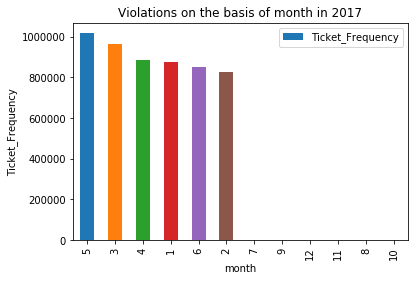

In [96]:
#Plot of month wise tickets
Violations_by_month = month_ticket.toPandas()
plt.clf()
Violations_by_month.plot(x= 'month', y='Ticket_Frequency', kind='bar')
plt.title("Violations on the basis of month in 2017")
plt.xlabel('month')
plt.ylabel('Ticket_Frequency')
plt.show()


d) can be seen maximum violations are from Jan - June and then insignificant